# ***Modelo KNN (K-Vecinos Más Cercanos)***

In [33]:
%load_ext kedro.ipython 

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [34]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'FIFA22_processed_con_transformacion2_columns',
    'FIFA21_processed_con_transformacion2_columnss',
    'FIFA20_processed_con_transformacion2_columns',
    'grid_linear_model',
    'grid_linear_multiple_model',
    'grid_svr_model',
    'grid_decision_tree_model',
    'grid_randomforest_model',
    'grid_logistic_model_classification',
    'grid_knn_model_classification',
    'grind_svc_cv_model_classification',
    'grid_decision_tree_model_classification',
    'grid_random_forest_model_classification',
    'X_train_regression',
    'X_test_regression',
    'y_test_regression',
    'X_train_class',
    'X_test_class',
    'y_train_class',
    'y_test_class',
    'regression_report_linear_simple',
    'regression_report_linear_multiple',
    'regression_report_svr',
    'regression_report_decision_tree',
    'regression_report_randomforest

In [35]:
catalog.load("model_input_table")

[11/20/25 23:50:30] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=746753;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=549206;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Best_Position_Grouped_FW,Best_Position_Grouped_GK,Best_Position_Grouped_MF,Overall_Class_Encoded,Year
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,3.0,...,179,69.000000,107500000.0,250000.0,206900000.0,False,False,True,0,2022
1,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,4.0,...,189,82.000000,93000000.0,140000.0,160400000.0,False,False,True,0,2022
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,2307,Right,5.0,4.0,...,182,83.000000,44500000.0,135000.0,91200000.0,True,False,False,0,2022
3,M. Acuña,29,Argentina,84,84,Sevilla FC,2292,Left,2.0,3.0,...,172,69.000000,37000000.0,45000.0,77700000.0,False,False,False,0,2022
4,J. Kimmich,26,Germany,89,90,FC Bayern München,2283,Right,4.0,4.0,...,177,75.000000,108000000.0,160000.0,186300000.0,False,False,True,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50521,V. Storsve,17,Norway,50,72,Lillestrøm SK,773,Right,1.0,2.0,...,185,64.863656,50000.0,5000.0,113000.0,False,True,False,1,2020
50522,B. Sinzig,19,Switzerland,50,60,Neuchâtel Xamax,764,Right,1.0,2.0,...,190,81.192968,35000.0,5000.0,58000.0,False,True,False,1,2020
50523,18 N. Krucker,18,Switzerland,50,61,FC St. Gallen,757,Right,1.0,3.0,...,183,79.832192,35000.0,1000.0,66000.0,False,True,False,1,2020
50524,18 A. Viscovo,18,Italy,51,70,Crotone,755,Right,1.0,2.0,...,190,78.925008,60000.0,5000.0,146000.0,False,True,False,1,2020


In [36]:
df_FIFA = catalog.load("model_input_table")

[11/20/25 23:50:31] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=58342;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=517451;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

#### **Importaciones**

In [37]:
# -- Tratamiento de datos --
import numpy as np
import pandas as pd

# -- Gráficos -- 
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

# -- Procesado y modelado --
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# -- Metricas para modelos de clasificación --
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

#----  Curva ROC y PR ----
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score

# -- GridSearchCV -- 
from sklearn.model_selection import GridSearchCV

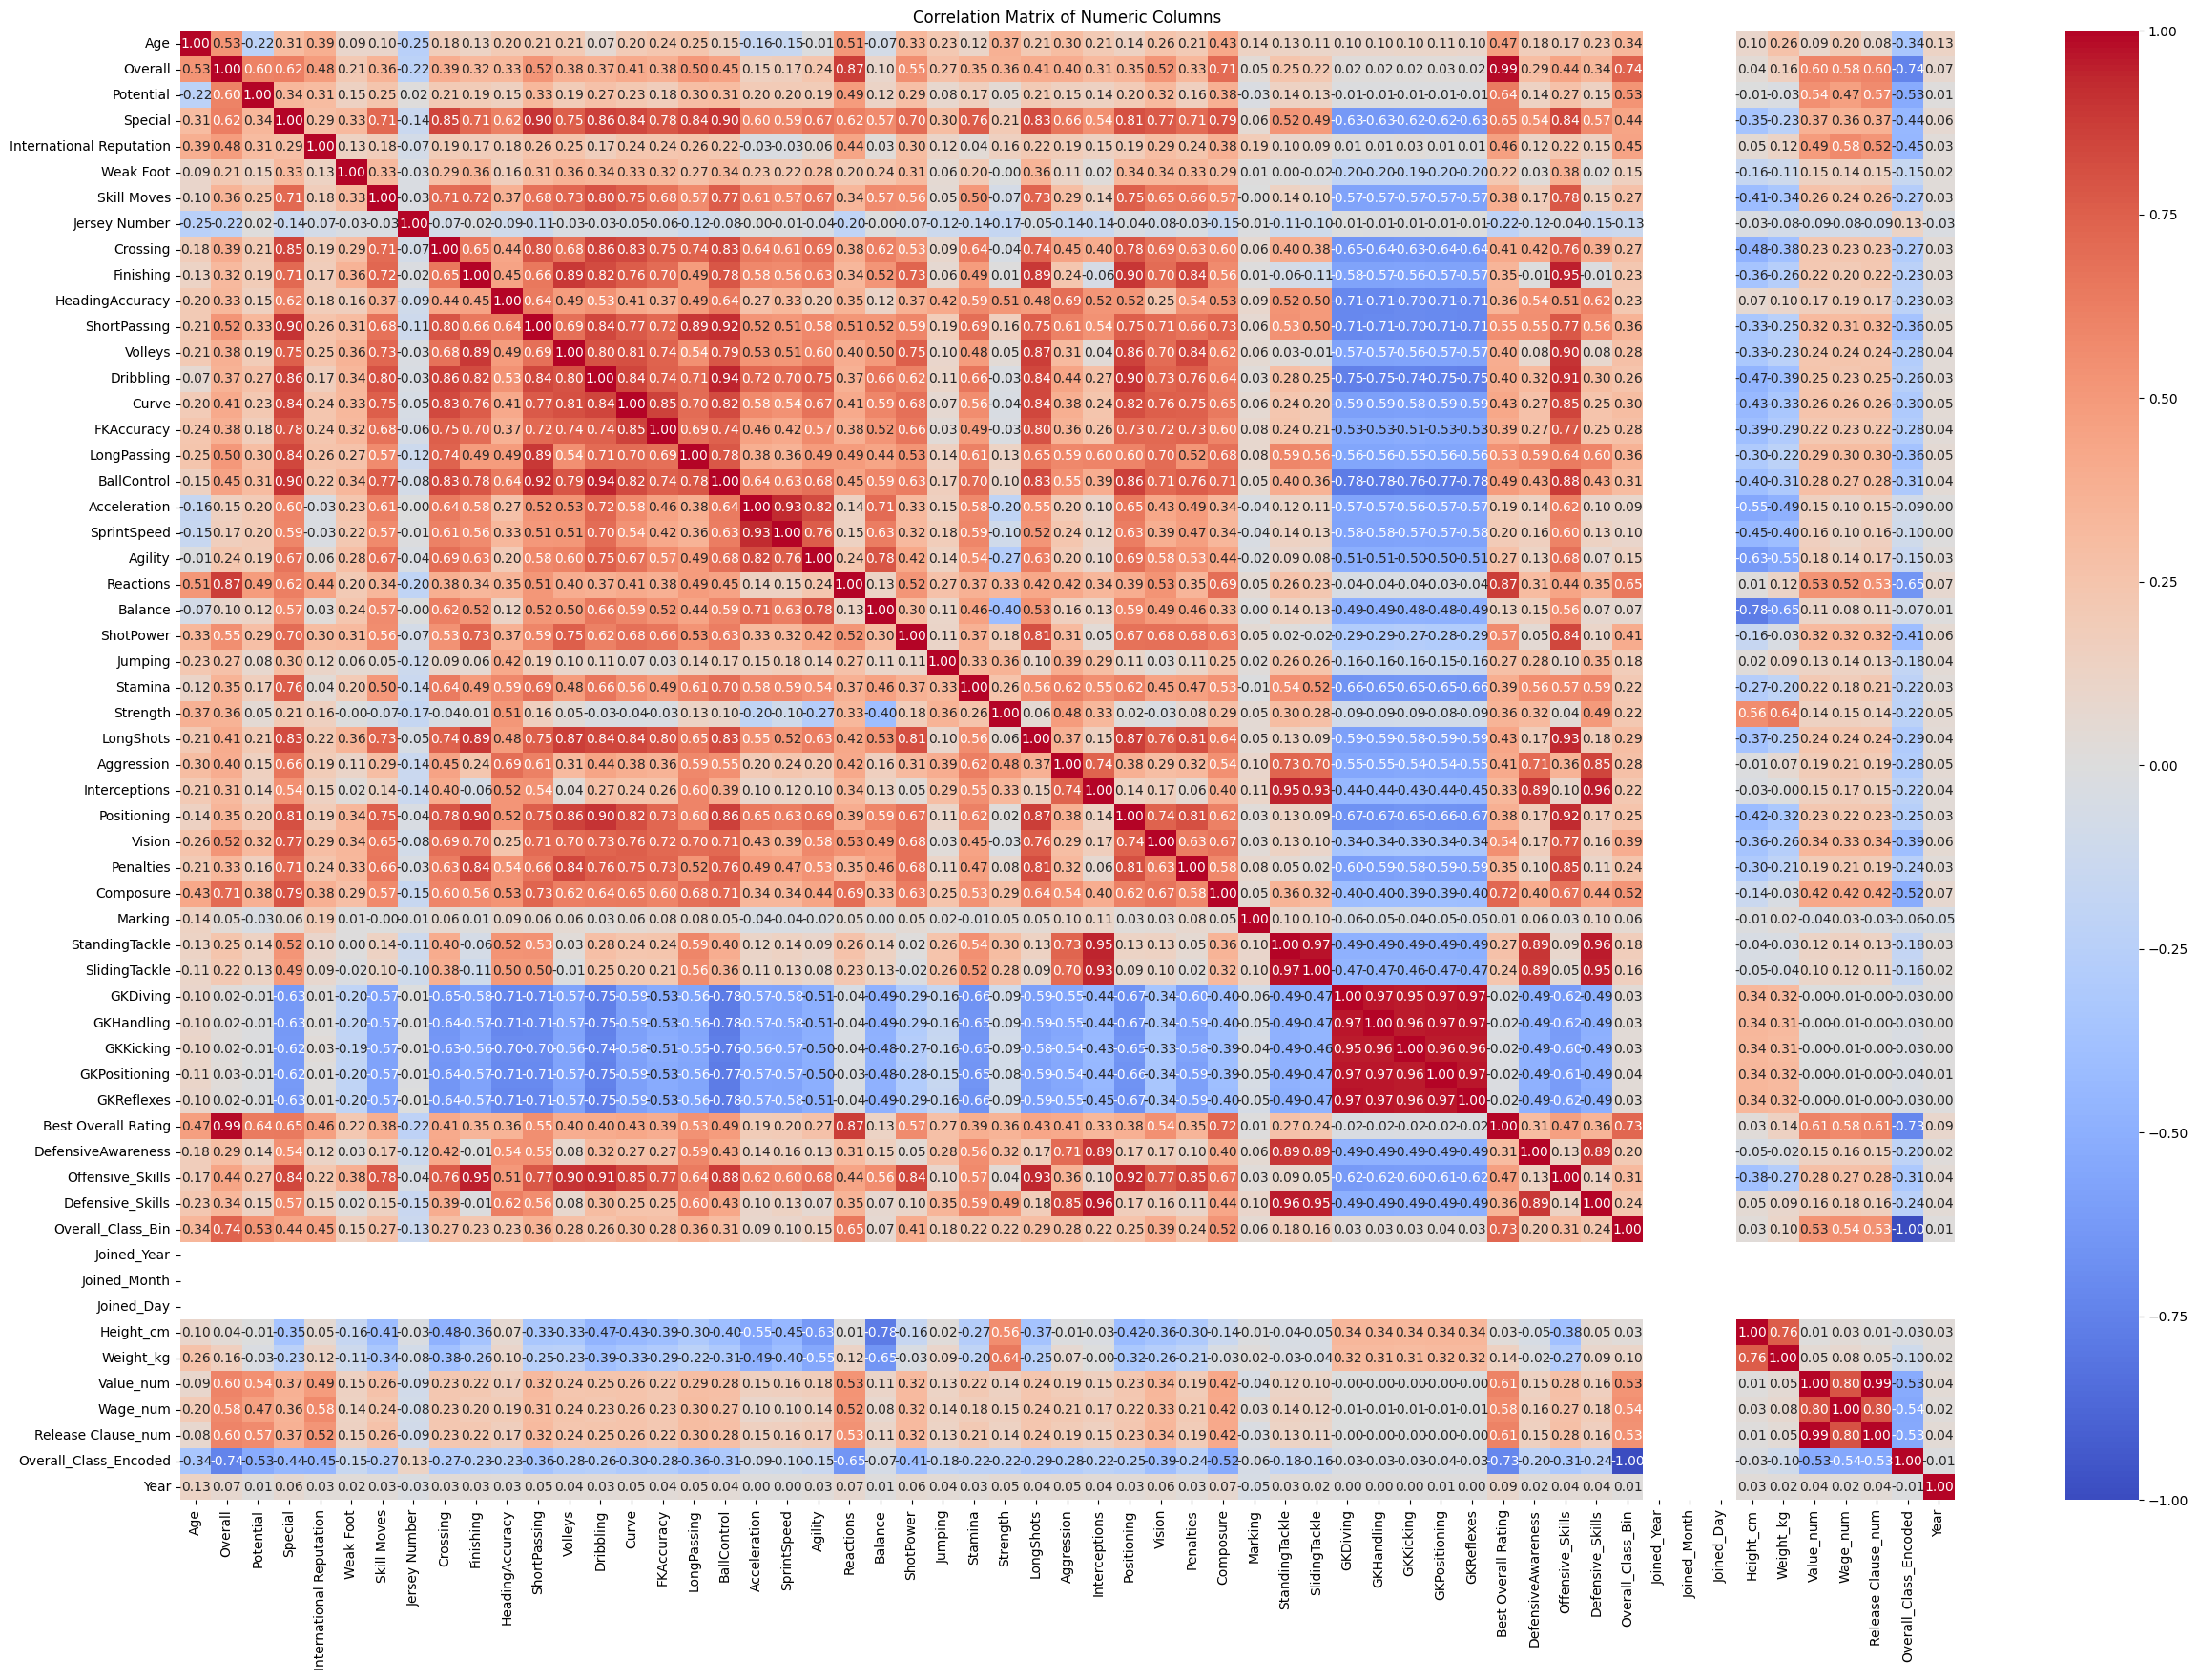

In [38]:
numeric_df = df_FIFA.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

## **Desarrollo del Modelo KNN**

#### **Selección de caracteristicas**

In [39]:
X = df_FIFA[["Potential",'Reactions','Composure']] 
y = df_FIFA[['Overall_Class_Bin']]
# posibles Target para clasificacion

'''
Overall_Class  
Overall_Class_Encoded  
Best Position  
Position  
Preferred Foot  
Work Rate  
Body Type  
Nationality  
Club  
Best_Position_Grouped_FW  
Best_Position_Grouped_GK  
Best_Position_Grouped_MF
'''
#Preferred Foot noo?

'\nOverall_Class  \nOverall_Class_Encoded  \nBest Position  \nPosition  \nPreferred Foot  \nWork Rate  \nBody Type  \nNationality  \nClub  \nBest_Position_Grouped_FW  \nBest_Position_Grouped_GK  \nBest_Position_Grouped_MF\n'

#### **División de los datos en entrenamiento y prueba**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30 ,random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Creación y entrenamiento del modelo KNN**

In [41]:
n_neighbors = 200 

modelo_KNN = KNeighborsClassifier(n_neighbors)
modelo_KNN.fit(X_train, y_train) 

[11/20/25 23:50:41] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

KNeighborsClassifier(n_neighbors=200)

#### **Predicciones sobre el conjunto de prueba**

In [42]:
y_pred = modelo_KNN.predict(X_test)

### **Métricas de evaluación**

In [43]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10758   432]
 [  674  3294]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11190
           1       0.88      0.83      0.86      3968

    accuracy                           0.93     15158
   macro avg       0.91      0.90      0.90     15158
weighted avg       0.93      0.93      0.93     15158



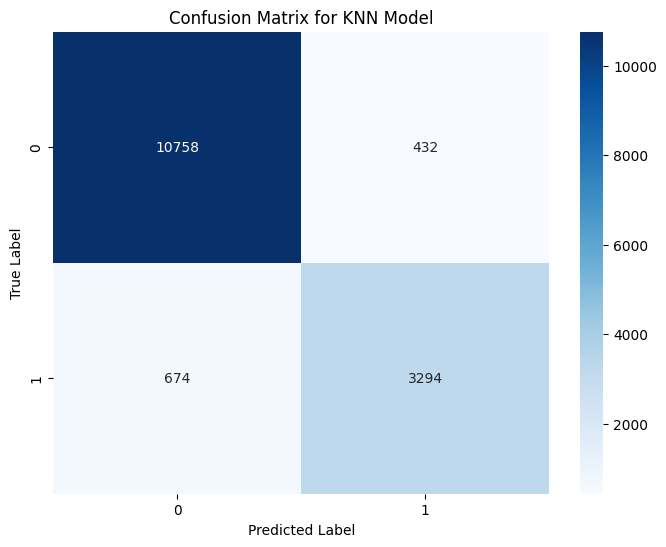

In [44]:
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN Model")
plt.show()

In [45]:
#creo que funciona para binarias 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate Sensitivity (Recall)
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity (Recall): 0.83
Specificity: 0.96


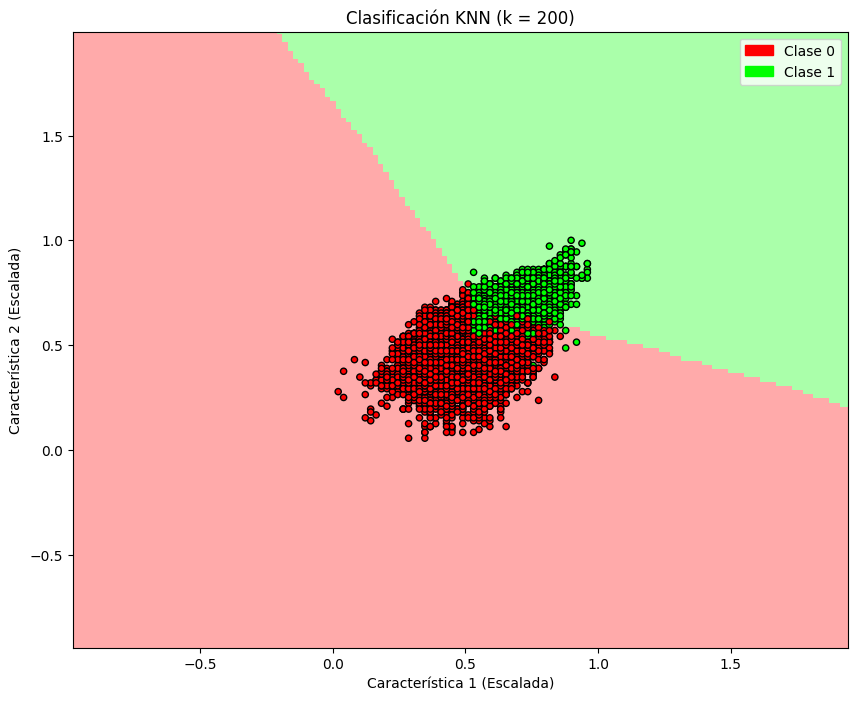

In [46]:

# Crear un mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Paso de la malla
h = .02

# Rango para las dos primeras features
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Número total de features esperadas por el modelo
n_features = modelo_KNN.n_features_in_

# Construir matriz de inputs con el promedio para el resto de variables
X_grid = np.tile(np.mean(X_test, axis=0), (xx.ravel().shape[0], 1))
X_grid[:, 0] = xx.ravel()
X_grid[:, 1] = yy.ravel()

# Predecir clases
Z = modelo_KNN.predict(X_grid)
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.to_numpy().flatten(), cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Clasificación KNN (k = {modelo_KNN.n_neighbors})")
plt.xlabel('Característica 1 (Escalada)')
plt.ylabel('Característica 2 (Escalada)')

# Leyenda
patch_0 = mpatches.Patch(color='#FF0000', label='Clase 0')
patch_1 = mpatches.Patch(color='#00FF00', label='Clase 1')
plt.legend(handles=[patch_0, patch_1])

plt.show()


#### **Curva ROC**

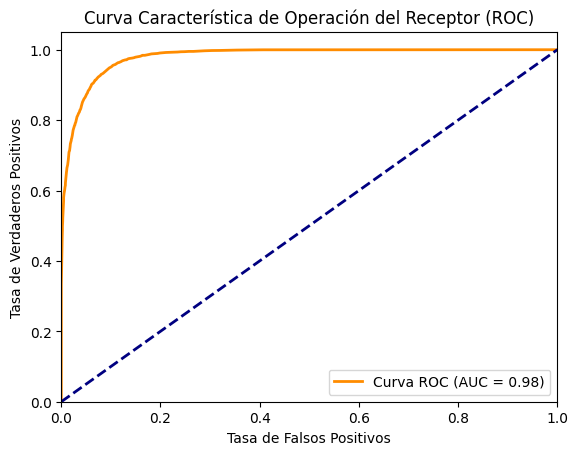

In [47]:
# Probabilidades de predicción
y_pred_proba = modelo_KNN.predict_proba(X_test)[:,1]

# Calcular la curva ROC y el área bajo la curva
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica de Operación del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

#### **Curva PR**

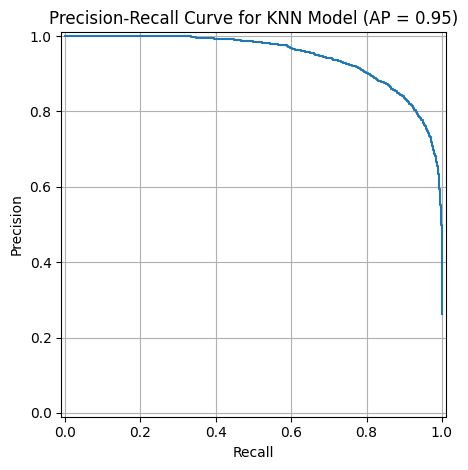

In [48]:
# Obtener probabilidades del modelo KNN (clase positiva)
y_pred_proba = modelo_KNN.predict_proba(X_test)[:, 1]

# Calcular precision, recall y thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva PR
ap_score = average_precision_score(y_test, y_pred_proba)

# Graficar
fig, ax = plt.subplots()
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot(ax=ax)
ax.set_title(f'Precision-Recall Curve for KNN Model (AP = {ap_score:.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()

### **GridsearchCV**

[11/20/25 23:50:49] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:50:50] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:50:51] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:50:52] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:50:53] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:50:54] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:50:55] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:50:56] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:50:57] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:50:58] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:50:59] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:00] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:01] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:02] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:03] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:04] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:05] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:06] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:07] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:08] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:09] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:10] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:11] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:12] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:13] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:14] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:15] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:16] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:17] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:18] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:19] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

[11/20/25 23:51:20] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\neighbors\_classification.py:238: DataConversionWarning: A                       
                             column-vector y was passed when a 1d array was expected. Please change                
                             the shape of y to (n_samples,), for example using ravel().                            
                               return self._fit(X, y)                                                              
                                                                                                                   

Mejores parámetros: {'n_neighbors': np.int64(37)}
Mejor puntuación de cross-validation: 0.9303891870237602
Accuracy en el conjunto de prueba con los mejores parámetros: 0.9315213088797994

Classification Report con los mejores parámetros:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11190
           1       0.88      0.86      0.87      3968

    accuracy                           0.93     15158
   macro avg       0.91      0.91      0.91     15158
weighted avg       0.93      0.93      0.93     15158


Confusion Matrix con los mejores parámetros:


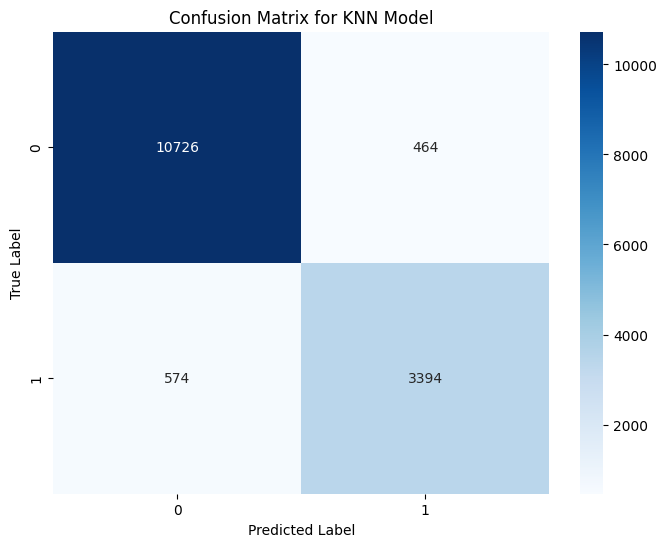


Accuracy Score (Grid Search):
0.9315213088797994


In [49]:
param_grid = {'n_neighbors': np.arange(1, 40)}

# Inicializar el modelo KNN
knn = KNeighborsClassifier()

# Inicializar GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy') # cv=5 para 5-fold cross-validation

# Entrenar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y la mejor puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación de cross-validation:", grid_search.best_score_)

# Obtener el mejor modelo entrenado
best_knn = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
test_accuracy = best_knn.score(X_test, y_test)
print("Accuracy en el conjunto de prueba con los mejores parámetros:", test_accuracy)

# Predecir con el mejor modelo
y_pred_gs = best_knn.predict(X_test)

# Mostrar métricas de clasificación para el mejor modelo
print("\nClassification Report con los mejores parámetros:")
print(classification_report(y_test, y_pred_gs))

print("\nConfusion Matrix con los mejores parámetros:")
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, y_pred_gs), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN Model")
plt.show()

print("\nAccuracy Score (Grid Search):")
print(accuracy_score(y_test, y_pred_gs))

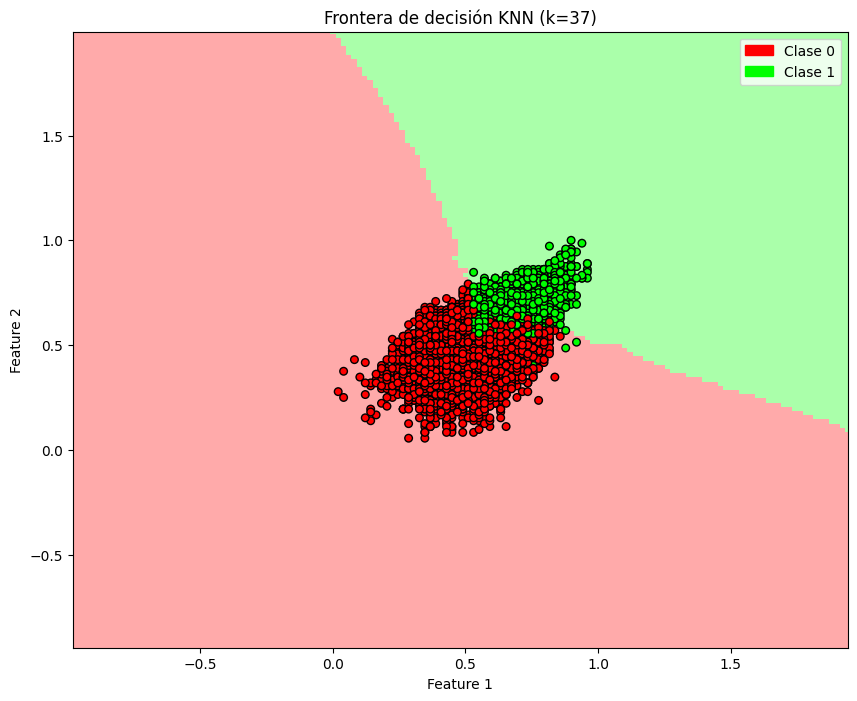

In [50]:
X_test_np = X_test.to_numpy() if hasattr(X_test, "to_numpy") else X_test
y_test_np = y_test.to_numpy().flatten() if hasattr(y_test, "to_numpy") else y_test

# Crear malla
h = 0.02
x_min, x_max = X_test_np[:, 0].min() - 1, X_test_np[:, 0].max() + 1
y_min, y_max = X_test_np[:, 1].min() - 1, X_test_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Construir matriz de inputs para predecir
n_samples = xx.ravel().shape[0]
n_features = best_knn.n_features_in_
X_grid = np.tile(np.mean(X_test_np, axis=0), (n_samples, 1))
X_grid[:, 0] = xx.ravel()
X_grid[:, 1] = yy.ravel()

# Predecir clases
Z = best_knn.predict(X_grid)
Z = Z.reshape(xx.shape)

# Graficar
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.scatter(X_test_np[:, 0], X_test_np[:, 1], c=y_test_np, cmap=cmap_bold, edgecolor='k', s=30)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Frontera de decisión KNN (k={best_knn.n_neighbors})")

# Leyenda
patch_0 = mpatches.Patch(color='#FF0000', label='Clase 0')
patch_1 = mpatches.Patch(color='#00FF00', label='Clase 1')
plt.legend(handles=[patch_0, patch_1])

plt.show()

#### **Sensitivity y Specificity modelo con GridSearchCV**

In [51]:
cm_best = confusion_matrix(y_test, y_pred_gs)

TN_best = cm_best[0, 0]
FP_best = cm_best[0, 1]
FN_best = cm_best[1, 0]
TP_best = cm_best[1, 1]

sensitivity_best = TP_best / (TP_best + FN_best)
specificity_best = TN_best / (TN_best + FP_best)

print(f"\nSensitivity (Best Model): {sensitivity_best:.4f}")
print(f"Specificity (Best Model): {specificity_best:.4f}")


Sensitivity (Best Model): 0.8553
Specificity (Best Model): 0.9585


### **Curva Roc y Curva PR de GridSearchCV**

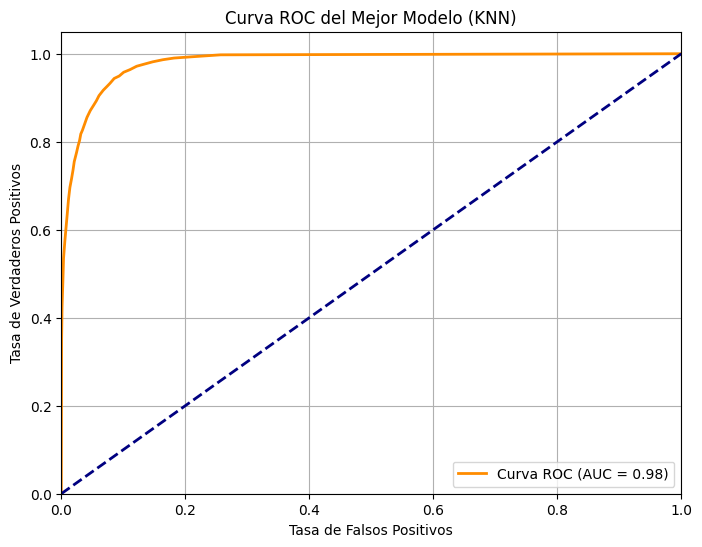

-


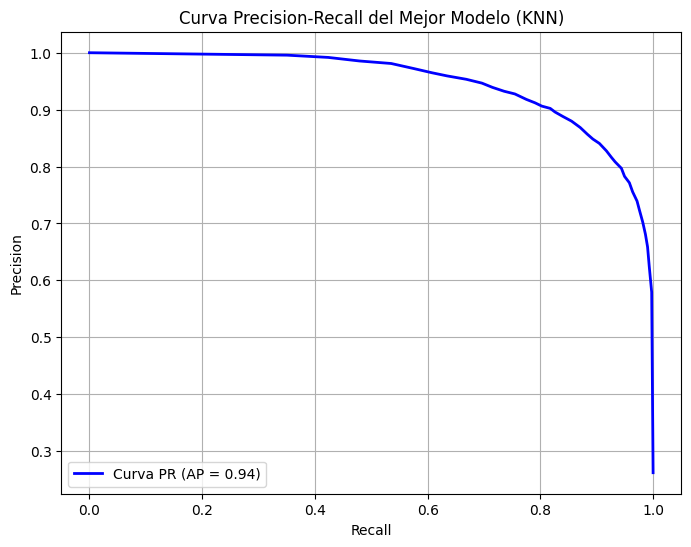

In [52]:
# Probabilidades para la clase positiva
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

# === CURVA ROC ===
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Mejor Modelo (KNN)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("-")
# === CURVA PRECISIÓN-RECALL ===
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Curva PR (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall del Mejor Modelo (KNN)')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()